In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Simple data preparation
# Both Linear and Logistic Regression will predict diabetes outcome
# Features: all columns except Outcome
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data (same split for both models for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for both models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target distribution - No Diabetes: {sum(y_train == 0)}, Diabetes: {sum(y_train == 1)}")
print("Data prepared successfully!")

Training set: (614, 8)
Test set: (154, 8)
Target distribution - No Diabetes: 401, Diabetes: 213
Data prepared successfully!


In [4]:
# Linear and Logistic Regression Implementation
print("LINEAR AND LOGISTIC REGRESSION - BOTH PREDICTING DIABETES OUTCOME")

# 1. Linear Regression (all default parameters shown)
# Treating diabetes prediction as a continuous problem
linear_reg = LinearRegression(
    fit_intercept=True,           # Whether to calculate the intercept (default)
    copy_X=True,                  # If True, X will be copied (default)
    n_jobs=None,                  # Number of jobs for computation (default)
    positive=False                # When set to True, forces coefficients to be positive (default)
)

linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)

# Convert continuous predictions to binary for comparison (threshold = 0.5)
linear_pred_binary = (linear_pred >= 0.5).astype(int)

# Linear regression metrics
mse_linear = mean_squared_error(y_test, linear_pred)
r2_linear = r2_score(y_test, linear_pred)
rmse_linear = np.sqrt(mse_linear)
accuracy_linear = accuracy_score(y_test, linear_pred_binary)

print(f"\n1. Linear Regression (Diabetes Prediction as Continuous):")
print(f"   MSE: {mse_linear:.4f}")
print(f"   RMSE: {rmse_linear:.4f}")
print(f"   R² Score: {r2_linear:.4f}")
print(f"   Accuracy (with 0.5 threshold): {accuracy_linear:.4f}")

# 2. Logistic Regression (all default parameters shown)
logistic_reg = LogisticRegression(
    penalty='l2',                 # Regularization penalty (default)
    dual=False,                   # Dual or primal formulation (default)
    tol=1e-4,                     # Tolerance for stopping criteria (default)
    C=1.0,                        # Inverse of regularization strength (default)
    fit_intercept=True,           # Whether to include intercept (default)
    intercept_scaling=1,          # Scaling between data features and synthetic intercept feature (default)
    class_weight=None,            # Weights associated with classes (default)
    random_state=42,              # Random seed for reproducibility
    solver='lbfgs',               # Algorithm to use in optimization (default)
    max_iter=100,                 # Maximum number of iterations (default)
    multi_class='auto',           # Multi-class option (default)
    verbose=0,                    # Verbosity level (default)
    warm_start=False,             # Reuse solution of previous call (default)
    n_jobs=None,                  # Number of CPU cores used (default)
    l1_ratio=None                 # Elastic-Net mixing parameter (default)
)

logistic_reg.fit(X_train_scaled, y_train)
logistic_pred = logistic_reg.predict(X_test_scaled)

# Logistic regression metrics
logistic_accuracy = accuracy_score(y_test, logistic_pred)

print(f"\n2. Logistic Regression (Diabetes Classification):")
print(f"   Accuracy: {logistic_accuracy:.4f}")

LINEAR AND LOGISTIC REGRESSION - BOTH PREDICTING DIABETES OUTCOME

1. Linear Regression (Diabetes Prediction as Continuous):
   MSE: 0.1710
   RMSE: 0.4136
   R² Score: 0.2550
   Accuracy (with 0.5 threshold): 0.7597

2. Logistic Regression (Diabetes Classification):
   Accuracy: 0.7532


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [5]:
# Performance Comparison
print("\nPERFORMANCE COMPARISON")

models_data = []

# Linear Regression metrics (treating as regression problem)
linear_precision = precision_score(y_test, linear_pred_binary)
linear_recall = recall_score(y_test, linear_pred_binary)
linear_f1 = f1_score(y_test, linear_pred_binary)

models_data.append({
    'Model': 'Linear Regression',
    'Task': 'Diabetes (Continuous)',
    'Accuracy': f'{accuracy_linear:.4f}',
    'Precision': f'{linear_precision:.4f}',
    'Recall': f'{linear_recall:.4f}',
    'F1-Score': f'{linear_f1:.4f}',
    'R²': f'{r2_linear:.4f}',
    'RMSE': f'{rmse_linear:.4f}'
})

# Logistic Regression metrics (classification problem)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)

models_data.append({
    'Model': 'Logistic Regression',
    'Task': 'Diabetes (Classification)',
    'Accuracy': f'{logistic_accuracy:.4f}',
    'Precision': f'{logistic_precision:.4f}',
    'Recall': f'{logistic_recall:.4f}',
    'F1-Score': f'{logistic_f1:.4f}',
    'R²': 'N/A',
    'RMSE': 'N/A'
})

# Create comparison DataFrame
comparison_df = pd.DataFrame(models_data)

print("\nModel Performance Summary:")
print(comparison_df.to_string(index=False))

print(f"\nBoth models predict diabetes outcome:")
print(f"Linear Regression treats it as continuous (0-1 range)")
print(f"Logistic Regression treats it as binary classification (0 or 1)")


PERFORMANCE COMPARISON

Model Performance Summary:
              Model                      Task Accuracy Precision Recall F1-Score     R²   RMSE
  Linear Regression     Diabetes (Continuous)   0.7597    0.6607 0.6727   0.6667 0.2550 0.4136
Logistic Regression Diabetes (Classification)   0.7532    0.6491 0.6727   0.6607    N/A    N/A

Both models predict diabetes outcome:
Linear Regression treats it as continuous (0-1 range)
Logistic Regression treats it as binary classification (0 or 1)


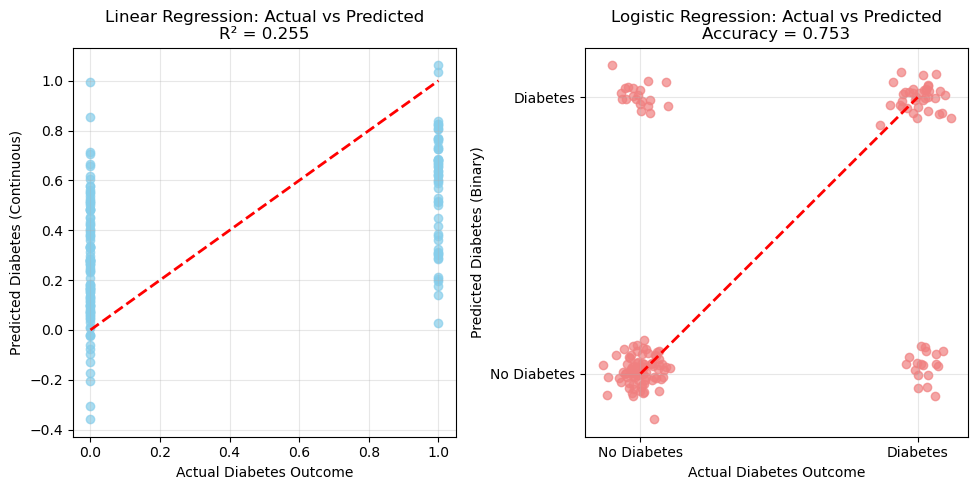

In [6]:
# Performance Visualization
plt.figure(figsize=(15, 5))

# Left subplot: Linear regression actual vs predicted (continuous)
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_pred, alpha=0.7, color='skyblue')
plt.plot([0, 1], [0, 1], 'r--', lw=2)
plt.xlabel('Actual Diabetes Outcome')
plt.ylabel('Predicted Diabetes (Continuous)')
plt.title(f'Linear Regression: Actual vs Predicted\nR² = {r2_linear:.3f}')
plt.grid(True, alpha=0.3)

# Middle subplot: Logistic regression actual vs predicted (binary)
plt.subplot(1, 3, 2)
# Add some jitter to see overlapping points better
jitter = 0.05
y_test_jitter = y_test + np.random.normal(0, jitter, size=len(y_test))
y_pred_jitter = logistic_pred + np.random.normal(0, jitter, size=len(logistic_pred))

plt.scatter(y_test_jitter, y_pred_jitter, alpha=0.7, color='lightcoral')
plt.plot([0, 1], [0, 1], 'r--', lw=2)
plt.xlabel('Actual Diabetes Outcome')
plt.ylabel('Predicted Diabetes (Binary)')
plt.title(f'Logistic Regression: Actual vs Predicted\nAccuracy = {logistic_accuracy:.3f}')
plt.grid(True, alpha=0.3)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

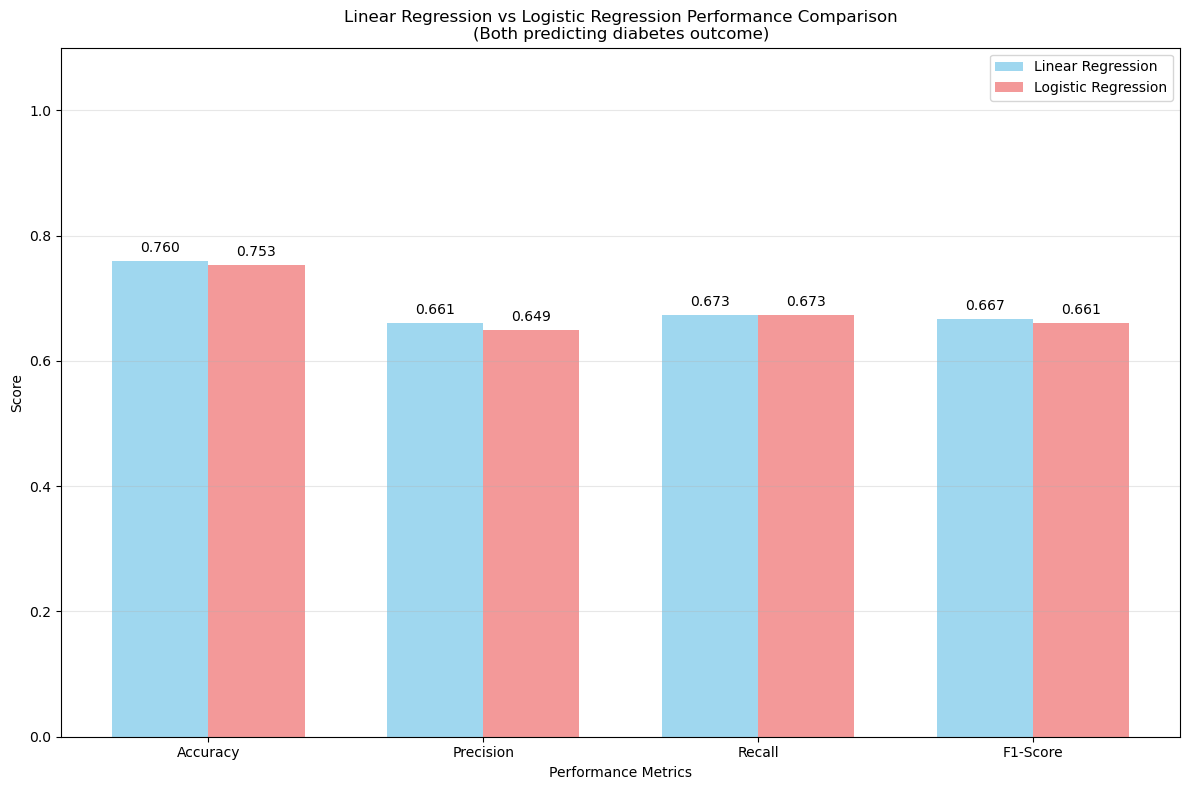

Comparison Summary:
Linear Regression (continuous approach): Accuracy = 0.760
Logistic Regression (classification approach): Accuracy = 0.753

Both models predict diabetes outcome but approach it differently:
- Linear Regression: Treats as continuous problem, then applies threshold
- Logistic Regression: Designed specifically for binary classification


In [7]:
# Linear vs Logistic Regression Comparison
# Both models now predict the same target (diabetes outcome)
plt.figure(figsize=(12, 8))

# Prepare comparison data for same target prediction
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression'],
    'Accuracy': [accuracy_linear, logistic_accuracy],
    'Precision': [linear_precision, logistic_precision], 
    'Recall': [linear_recall, logistic_recall],
    'F1-Score': [linear_f1, logistic_f1]
})

models = models_comparison['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral']

x = np.arange(len(metrics))
width = 0.35

for i, model in enumerate(models):
    values = [models_comparison.iloc[i][metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model, color=colors[i], alpha=0.8)
    for j, v in enumerate(values):
        plt.text(x[j] + i*width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('Linear Regression vs Logistic Regression Performance Comparison\n(Both predicting diabetes outcome)')
plt.xticks(x + width/2, metrics)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Add explanatory note
print("Comparison Summary:")
print(f"Linear Regression (continuous approach): Accuracy = {accuracy_linear:.3f}")
print(f"Logistic Regression (classification approach): Accuracy = {logistic_accuracy:.3f}")
print("\nBoth models predict diabetes outcome but approach it differently:")
print("- Linear Regression: Treats as continuous problem, then applies threshold")
print("- Logistic Regression: Designed specifically for binary classification")